In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
total_df = pd.read_csv("cases-by-day.csv")

In [3]:
infected_df = total_df[["date_of_interest", "BX_CASE_COUNT", "BX_PROBABLE_CASE_COUNT"]]

In [4]:
infected_df

,date_of_interest,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT
0,02/29/2020,0,0
1,03/01/2020,0,0
2,03/02/2020,0,0
3,03/03/2020,0,0
4,03/04/2020,0,0
...,...,...,...
753,03/23/2022,82,16
754,03/24/2022,98,19
755,03/25/2022,86,28
756,03/26/2022,45,13


In [5]:
hospital_df = pd.read_csv("hosp-by-day.csv")
hospital_df.head()

,date_of_interest,HOSPITALIZED_COUNT,HOSP_COUNT_7DAY_AVG,BX_HOSPITALIZED_COUNT,BX_HOSPITALIZED_COUNT_7DAY_AVG,BK_HOSPITALIZED_COUNT,BK_HOSPITALIZED_COUNT_7DAY_AVG,MN_HOSPITALIZED_COUNT,MN_HOSPITALIZED_COUNT_7DAY_AVG,QN_HOSPITALIZED_COUNT,QN_HOSPITALIZED_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT,SI_HOSPITALIZED_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,0,0,1,0,0,0,0,0,0,0,NaN
1,03/01/2020,1,0,1,0,0,0,0,0,0,0,0,0,NaN
2,03/02/2020,2,0,0,0,2,0,0,0,0,0,0,0,NaN
3,03/03/2020,7,0,1,0,3,0,1,0,2,0,0,0,NaN
4,03/04/2020,2,0,0,0,1,0,1,0,0,0,0,0,NaN


In [6]:
hos_df = hospital_df[["date_of_interest", "BX_HOSPITALIZED_COUNT"]]
hos_df

,date_of_interest,BX_HOSPITALIZED_COUNT
0,02/29/2020,0
1,03/01/2020,1
2,03/02/2020,0
3,03/03/2020,1
4,03/04/2020,0
...,...,...
753,03/23/2022,6
754,03/24/2022,1
755,03/25/2022,1
756,03/26/2022,3


In [7]:
death_df = pd.read_csv("deaths-by-day.csv")
dead_df = death_df[["date_of_interest" , "BX_DEATH_COUNT"]]
dead_df

,date_of_interest,BX_DEATH_COUNT
0,02/29/2020,0
1,03/01/2020,0
2,03/02/2020,0
3,03/03/2020,0
4,03/04/2020,0
...,...,...
753,03/23/2022,1
754,03/24/2022,1
755,03/25/2022,2
756,03/26/2022,2


In [8]:
data_frame = infected_df
data_frame["hosp"] = hos_df[["BX_HOSPITALIZED_COUNT"]]
data_frame["dead"] = dead_df[["BX_DEATH_COUNT"]]

/var/folders/54/q7rzqy794_n1_10_bkdqp42w0000gn/T/ipykernel_1990/547682318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["hosp"] = hos_df[["BX_HOSPITALIZED_COUNT"]]
/var/folders/54/q7rzqy794_n1_10_bkdqp42w0000gn/T/ipykernel_1990/547682318.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["dead"] = dead_df[["BX_DEATH_COUNT"]]


In [9]:
data_frame

,date_of_interest,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,hosp,dead
0,02/29/2020,0,0,0,0
1,03/01/2020,0,0,1,0
2,03/02/2020,0,0,0,0
3,03/03/2020,0,0,1,0
4,03/04/2020,0,0,0,0
...,...,...,...,...,...
753,03/23/2022,82,16,6,1
754,03/24/2022,98,19,1,1
755,03/25/2022,86,28,1,2
756,03/26/2022,45,13,3,2


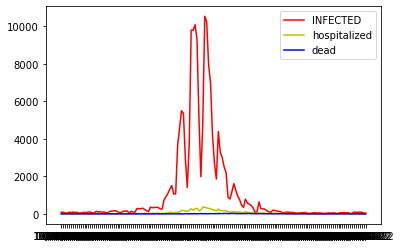

In [10]:
#data_frame.plot(x ='date_of_interest', y='Unemployment_Rate', kind = 'line')
plt.plot(data_frame["date_of_interest"][600:], data_frame["BX_CASE_COUNT"][600:], "r", label="INFECTED")
plt.plot(data_frame["date_of_interest"][600:], data_frame["hosp"][600:], "y", label="hospitalized")
plt.plot(data_frame["date_of_interest"][600:], data_frame["dead"][600:], "b", label="dead")
plt.legend()
plt.show()

In [11]:
data_frame["exposed_to_infected_rate"] = data_frame["BX_CASE_COUNT"].astype(float) / (data_frame["BX_CASE_COUNT"].astype(float) + data_frame["BX_PROBABLE_CASE_COUNT"].astype(float))

/var/folders/54/q7rzqy794_n1_10_bkdqp42w0000gn/T/ipykernel_1990/1410604065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["exposed_to_infected_rate"] = data_frame["BX_CASE_COUNT"].astype(float) / (data_frame["BX_CASE_COUNT"].astype(float) + data_frame["BX_PROBABLE_CASE_COUNT"].astype(float))


In [12]:
data_frame

,date_of_interest,BX_CASE_COUNT,BX_PROBABLE_CASE_COUNT,hosp,dead,exposed_to_infected_rate
0,02/29/2020,0,0,0,0,NaN
1,03/01/2020,0,0,1,0,NaN
2,03/02/2020,0,0,0,0,NaN
3,03/03/2020,0,0,1,0,NaN
4,03/04/2020,0,0,0,0,NaN
...,...,...,...,...,...,...
753,03/23/2022,82,16,6,1,0.836735
754,03/24/2022,98,19,1,1,0.837607
755,03/25/2022,86,28,1,2,0.754386
756,03/26/2022,45,13,3,2,0.775862


In [13]:
exposed_to_infected_rates = data_frame[["exposed_to_infected_rate"]]
exposed_to_infected_rates

,exposed_to_infected_rate
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
753,0.836735
754,0.837607
755,0.754386
756,0.775862


In [14]:
exposed_to_infected_rates = exposed_to_infected_rates[3:]
exposed_to_infected_rates

,exposed_to_infected_rate
3,NaN
4,NaN
5,NaN
6,1.000000
7,NaN
...,...
753,0.836735
754,0.837607
755,0.754386
756,0.775862


In [15]:
#use the rate within 100
e_i_rates = exposed_to_infected_rates[-100:]
e_i_rates.mean()

exposed_to_infected_rate    0.849177
dtype: float64

In [17]:
data_frame["infected_to_hospital_rate"] = data_frame["hosp"].astype(float) / (data_frame["BX_CASE_COUNT"].astype(float))

/var/folders/54/q7rzqy794_n1_10_bkdqp42w0000gn/T/ipykernel_1990/205516211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["infected_to_hospital_rate"] = data_frame["hosp"].astype(float) / (data_frame["BX_CASE_COUNT"].astype(float))


In [18]:
data_frame["infected_to_dead_rate"] = data_frame["dead"].astype(float) / (data_frame["BX_CASE_COUNT"].astype(float))

/var/folders/54/q7rzqy794_n1_10_bkdqp42w0000gn/T/ipykernel_1990/2451503232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["infected_to_dead_rate"] = data_frame["dead"].astype(float) / (data_frame["BX_CASE_COUNT"].astype(float))


In [45]:
data_frame

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,hosp,dead,exposed_to_infected_rate,infected_to_hospital_rate,infected_to_dead_rate
0,02/29/2020,1,0,1,0,1.000000,1.000000,0.000000
1,03/01/2020,0,0,1,0,NaN,inf,NaN
2,03/02/2020,0,0,2,0,NaN,inf,NaN
3,03/03/2020,1,0,7,0,1.000000,7.000000,0.000000
4,03/04/2020,5,0,2,0,1.000000,0.400000,0.000000
...,...,...,...,...,...,...,...,...
753,03/23/2022,1175,189,19,4,0.861437,0.016170,0.003404
754,03/24/2022,1063,188,13,5,0.849720,0.012230,0.004704
755,03/25/2022,997,189,17,4,0.840641,0.017051,0.004012
756,03/26/2022,595,167,15,3,0.780840,0.025210,0.005042


In [19]:
infected_to_hosp_rates = data_frame[["infected_to_hospital_rate"]]
infected_to_hosp_rates = infected_to_hosp_rates[3:]
#use the rate within 100
i_h_rates = infected_to_hosp_rates[-100:]
i_h_rates.mean()

infected_to_hospital_rate    0.118071
dtype: float64

In [20]:
infected_to_dead_rates = data_frame[["infected_to_dead_rate"]]
infected_to_dead_rates = infected_to_dead_rates[3:]
#use the rate within 100
i_d_rates = infected_to_dead_rates[-100:]
i_d_rates.mean()

infected_to_dead_rate    0.036464
dtype: float64

In [21]:
data_frame["hosp_to_dead_rate"] = data_frame["dead"].astype(float) / (data_frame["hosp"].astype(float))
hosp_to_dead_rates = data_frame[["hosp_to_dead_rate"]]
hosp_to_dead_rates = hosp_to_dead_rates[3:]
#use the rate within 100
h_d_rates = hosp_to_dead_rates[-100:]
h_d_rates.mean()

/var/folders/54/q7rzqy794_n1_10_bkdqp42w0000gn/T/ipykernel_1990/4263993185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame["hosp_to_dead_rate"] = data_frame["dead"].astype(float) / (data_frame["hosp"].astype(float))


hosp_to_dead_rate    0.268137
dtype: float64